In [1]:
import numpy as np # linear algebra
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
naValues = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for i in naValues:
    df[i][(df[i].isnull()) & (df["Outcome"] == 0)] = df[i][(df[i].isnull()) & (df["Outcome"] == 0)].fillna(df[i][df["Outcome"] == 0].mean())
    df[i][(df[i].isnull()) & (df["Outcome"] == 1)] = df[i][(df[i].isnull()) & (df["Outcome"] == 1)].fillna(df[i][df["Outcome"] == 1].mean())

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

df[(df["Glucose"].isnull()) & (df["Outcome"] == 0)]

df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 0)] = df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 0)].fillna(110.643863)

df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 1)] = df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 1)].fillna(142.319549)

#----------------------------------------------------------------

df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 0)] = df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 0)].fillna(70.877339)

df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 1)] = df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 1)].fillna(75.321429)

#-----------------------------------------------------------------

df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 0)] = df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 0)].fillna(27.235457)

df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 1)] = df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 1)].fillna(33.000000)

#-----------------------------------------------------------------

df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 0)] = df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 0)].fillna(130.287879)

df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 1)] = df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 1)].fillna(206.846154)

#-----------------------------------------------------------------

df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 0)] = df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 0)].fillna(30.859674)

df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 1)] = df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 1)].fillna(35.406767)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
df.shape

(768, 9)

In [13]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Outcome'>

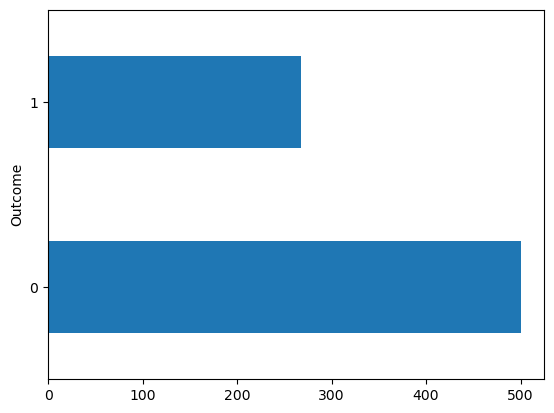

In [15]:
df.Outcome.value_counts().plot.barh()

In [16]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.000,1.00000,3.000000,6.000000,7.000000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,121.697358,30.462008,44.000,67.67000,80.00000,86.700,99.75000,117.000000,141.000000,147.000000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,72.428141,12.106044,24.000,44.00000,52.00000,58.000,64.00000,72.000000,80.000000,82.000000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,29.247042,8.923908,7.000,10.00000,14.35000,18.000,25.00000,28.000000,33.000000,35.000000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,157.003527,88.860914,14.000,24.34000,50.00000,67.000,121.50000,130.287879,206.846154,206.846154,210.0000,293.00000,519.90000,846.00
BMI,768.0,32.446420,6.878970,18.200,19.50000,22.23500,24.000,27.50000,32.050000,36.600000,37.800000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.165,0.24375,0.372500,0.626250,0.687000,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,22.000,24.00000,29.000000,41.000000,42.600000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.000,0.00000,0.000000,1.000000,1.000000,1.0000,1.00000,1.00000,1.00


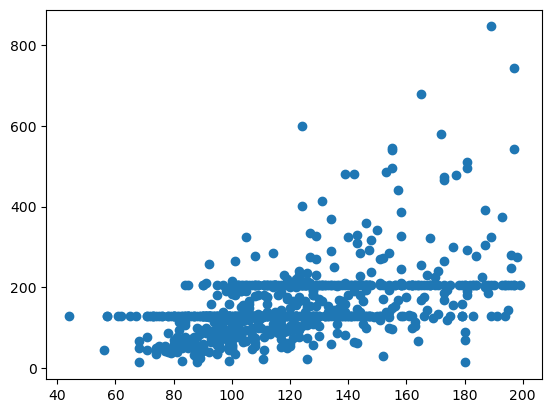

In [17]:
plt.scatter(df.Glucose,df.Insulin)

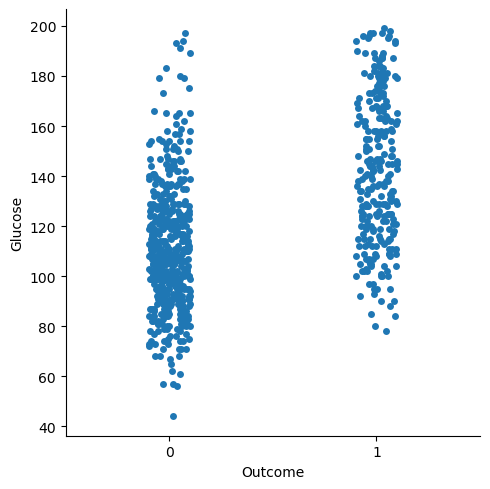

In [18]:
sns.catplot(x = "Outcome", y = "Glucose", data = df);

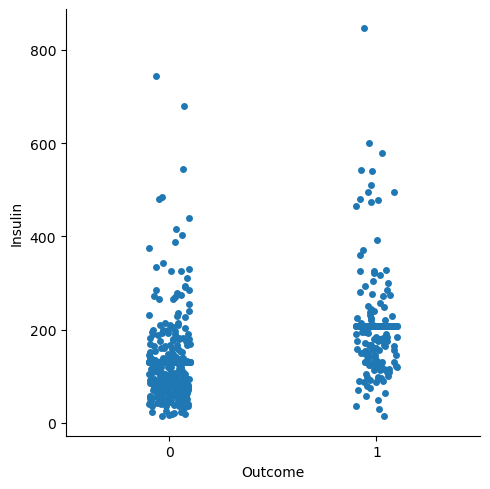

In [19]:
sns.catplot(x = "Outcome", y = "Insulin", data = df);

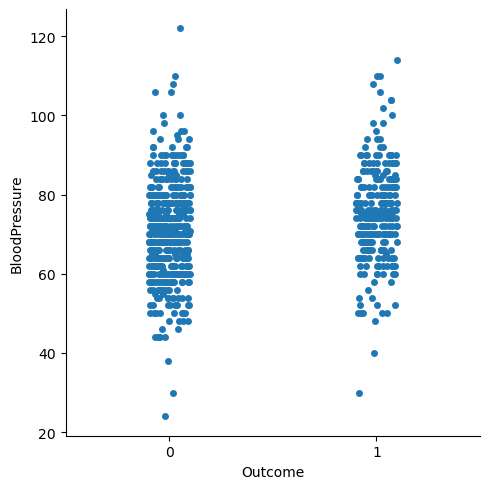

In [20]:
sns.catplot(x = "Outcome", y = "BloodPressure", data = df);

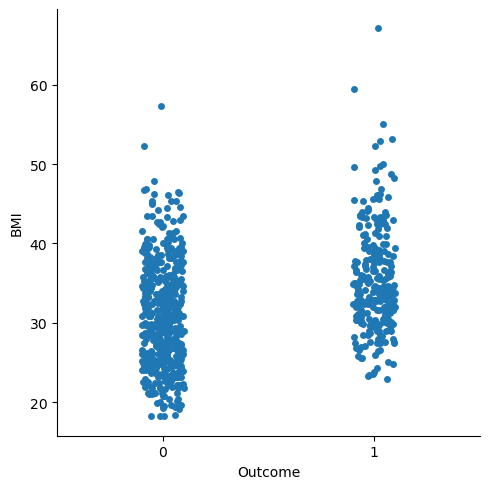

In [21]:
sns.catplot(x = "Outcome", y = "BMI", data = df);#the 0 value for outcome feature is more dense around 20 BMI. Healthy people are more generally 0.

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,-0.033523,0.544341,0.221898
Glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
BloodPressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,-0.002264,0.324439,0.175087
SkinThickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
Insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
BMI,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,-0.033523,0.138125,-0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
Outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


<Axes: >

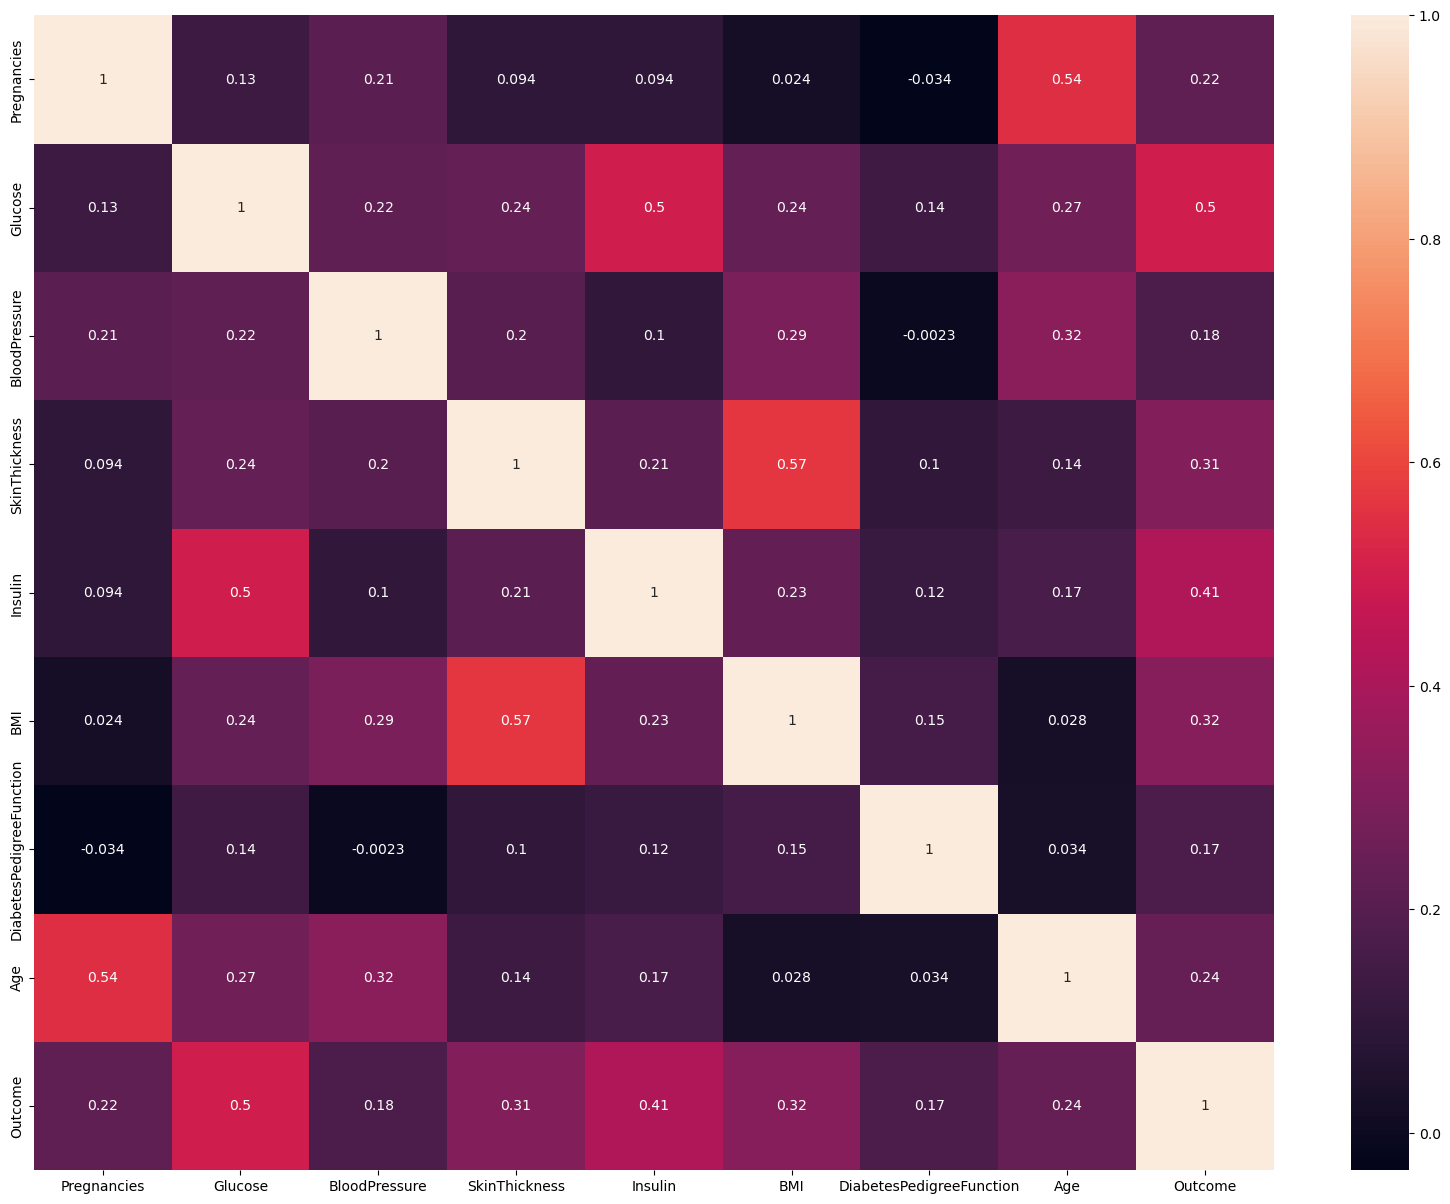

In [23]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(),annot=True,ax=ax)

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [25]:
for feature in df:

    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
        print("lower",lower,"\nupper",upper)
        df.loc[df[feature] > upper,feature] = upper
    else:
        print(feature, "no")
        

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
1
lower -30.124999999999993 
upper 88.475
Insulin yes
3
lower -314.5 
upper 657.5
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.233338,156.616157,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.824174,86.319814,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,88.475000,657.500000,67.10000,2.420000,81.000000,1.000000


In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [28]:
df['BMIRanges'] = pd.cut(x=df['BMI'], bins=[0,18.5,25,30,100],labels = ["Underweight","Healthy","Overweight","Obese"])

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese


In [30]:
df.groupby(["Outcome","BMIRanges"]).describe()

Pregnancies                                           \
                          count      mean       std  min   25%  50%  75%   
Outcome BMIRanges                                                          
0       Underweight         4.0  0.750000  0.500000  0.0  0.75  1.0  1.0   
        Healthy           101.0  3.138614  2.959830  0.0  1.00  2.0  5.0   
        Overweight        136.0  3.279412  2.769386  0.0  1.00  2.0  5.0   
        Obese             259.0  3.409266  3.173667  0.0  1.00  2.0  5.0   
1       Healthy             7.0  5.285714  2.811541  1.0  3.50  6.0  7.0   
        Overweight         44.0  5.818182  3.315031  0.0  3.00  6.0  8.0   
        Obese             217.0  4.658986  3.828962  0.0  1.00  4.0  7.0   

                          Glucose              ... DiabetesPedigreeFunction  \
                      max   count        mean  ...                      75%   
Outcome BMIRanges                              ...                            
0       Underweight   1.0     4.0   95.250000  ...                  0.59250   
        Healthy      13.0   101.0  104.689543  ...                  0.49100   
        Overweight   12.0   136.0  113.482675  ...                  0.56800   
        Obese        13.0   259.0  111.712911  ...                  0.56500   
1       Healthy       9.0     7.0  157.571429  ...                  0.55950   
        Overweight   13.0    44.0  131.840909  ...                  0.72425   
        Obese        17.0   217.0  143.952254  ...                  0.74200   

                              Age                                           \
                       max  count       mean        std   min    25%   50%   
Outcome BMIRanges                                                            
0       Underweight  0.624    4.0  24.000000   3.464102  21.0  21.00  24.0   
        Healthy      1.698  101.0  31.099010  12.903879  21.0  22.00  26.0   
        Overweight   1.699  136.0  31.360294  12.994969  21.0  22.00  27.0   
        Obese        2.329  259.0  31.247104  10.461110  21.0  24.00  27.0   
1       Healthy      0.678    7.0  44.285714  14.738999  23.0  32.50  50.0   
        Overweight   1.318   44.0  37.931818   9.879266  22.0  29.75  36.0   
        Obese        2.420  217.0  36.658986  11.010678  21.0  27.00  36.0   

                                 
                      75%   max  
Outcome BMIRanges                
0       Underweight  27.0  27.0  
        Healthy      35.0  72.0  
        Overweight   36.0  81.0  
        Obese        38.0  69.0  
1       Healthy      56.0  60.0  
        Overweight   46.0  62.0  
        Obese        43.0  70.0  

[7 rows x 64 columns]

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese


In [32]:
df["Insulin"].describe().T

count    768.000000
mean     156.616157
std       86.319814
min       14.000000
25%      121.500000
50%      130.287879
75%      206.846154
max      657.500000
Name: Insulin, dtype: float64

In [33]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [34]:
df = df.assign(INSULIN_DESC=df.apply(set_insulin, axis=1))


In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges,INSULIN_DESC
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese,Abnormal
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy,Abnormal
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese,Abnormal


In [36]:
df['NewGlucose'] = pd.cut(x=df['Glucose'], bins=[0,70,99,126,200],labels = ["Low","Normal","Secret","High"])

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges,INSULIN_DESC,NewGlucose
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese,Abnormal,High
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese,Abnormal,High


In [38]:
df = pd.get_dummies(df,drop_first=True)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges_Healthy,BMIRanges_Overweight,BMIRanges_Obese,INSULIN_DESC_Normal,NewGlucose_Normal,NewGlucose_Secret,NewGlucose_High
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,False,False,True,False,False,False,True
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,False,True,False,True,True,False,False
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,True,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,False,True,False,True,True,False,False
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,False,False,True,False,False,False,True


In [40]:
from sklearn.preprocessing import RobustScaler


In [41]:
r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(df.drop(["Outcome","BMIRanges_Healthy","BMIRanges_Overweight","BMIRanges_Obese","INSULIN_DESC_Normal","NewGlucose_Normal","NewGlucose_Secret","NewGlucose_High"],axis=1))

df_r = pd.DataFrame(df_r, columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

In [42]:
df_r

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000,0.875,0.897033,0.170330,0.665359,1.235294
1,-0.4,-0.775758,-0.375,0.125,0.000000,-0.598901,-0.056209,0.117647
2,1.0,1.600000,-0.500,0.625,0.897033,-0.961538,0.783007,0.176471
3,-0.4,-0.678788,-0.375,-0.625,-0.425185,-0.434066,-0.537255,-0.470588
4,-0.6,0.484848,-2.000,0.875,0.441873,1.214286,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.250,2.500,0.582476,0.093407,-0.526797,2.000000
764,-0.2,0.121212,-0.125,-0.125,0.000000,0.521978,-0.084967,-0.117647
765,0.4,0.096970,0.000,-0.625,-0.214279,-0.642857,-0.333333,0.058824
766,-0.4,0.218182,-0.750,0.625,0.897033,-0.214286,-0.061438,1.058824


In [43]:
df = pd.concat([df_r,df[["Outcome","BMIRanges_Healthy","BMIRanges_Overweight","BMIRanges_Obese","INSULIN_DESC_Normal","NewGlucose_Normal","NewGlucose_Secret","NewGlucose_High"]]],axis=1)

In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges_Healthy,BMIRanges_Overweight,BMIRanges_Obese,INSULIN_DESC_Normal,NewGlucose_Normal,NewGlucose_Secret,NewGlucose_High
0,0.6,0.751515,0.000,0.875,0.897033,0.170330,0.665359,1.235294,1,False,False,True,False,False,False,True
1,-0.4,-0.775758,-0.375,0.125,0.000000,-0.598901,-0.056209,0.117647,0,False,True,False,True,True,False,False
2,1.0,1.600000,-0.500,0.625,0.897033,-0.961538,0.783007,0.176471,1,True,False,False,False,False,False,True
3,-0.4,-0.678788,-0.375,-0.625,-0.425185,-0.434066,-0.537255,-0.470588,0,False,True,False,True,True,False,False
4,-0.6,0.484848,-2.000,0.875,0.441873,1.214286,5.007843,0.235294,1,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.250,2.500,0.582476,0.093407,-0.526797,2.000000,0,False,False,True,False,False,True,False
764,-0.2,0.121212,-0.125,-0.125,0.000000,0.521978,-0.084967,-0.117647,0,False,False,True,True,False,True,False
765,0.4,0.096970,0.000,-0.625,-0.214279,-0.642857,-0.333333,0.058824,0,False,True,False,True,False,True,False
766,-0.4,0.218182,-0.750,0.625,0.897033,-0.214286,-0.061438,1.058824,1,False,False,True,False,False,True,False


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   BMIRanges_Healthy         768 non-null    bool   
 10  BMIRanges_Overweight      768 non-null    bool   
 11  BMIRanges_Obese           768 non-null    bool   
 12  INSULIN_DESC_Normal       768 non-null    bool   
 13  NewGlucose_Normal         768 non-null    bool   
 14  NewGlucose

In [46]:
models = []

models.append(("Logistic Regression", LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))

In [47]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=46)

for name,model in models:
    mod = model.fit(X_train,y_train) #trainleri modele fit etmek
    y_pred = mod.predict(X_test) # tahmin
    acc = accuracy_score(y_test, y_pred) #rmse hesabı
    cvscore = cross_val_score(model, X,y, cv = 10).mean()
    print("Classification Model: ",end=" ")
    print(name) #yazdırılacak kısım
    print("Cross Validation Score: ",end=" ")
    print(cvscore)
    print("----------------------------------------------------------")

Classification Model:  Logistic Regression
Cross Validation Score:  0.8462576896787424
----------------------------------------------------------
Classification Model:  KNN
Cross Validation Score:  0.8268113465481888
----------------------------------------------------------
Classification Model:  SVR
Cross Validation Score:  0.8436773752563227
----------------------------------------------------------
Classification Model:  Decision Tree
Cross Validation Score:  0.8542207792207792
----------------------------------------------------------
Classification Model:  RandomForest
Cross Validation Score:  0.8632604237867396
----------------------------------------------------------
Classification Model:  GradientBoosting
Cross Validation Score:  0.8971804511278195
----------------------------------------------------------
Classification Model:  XGBoost
Cross Validation Score:  0.8880724538619275
----------------------------------------------------------


In [48]:
model=GradientBoostingClassifier()

In [49]:
mod = model.fit(X_train,y_train) 
y_pred = mod.predict(X_test) 

In [50]:
cvscore = cross_val_score(model, X,y, cv = 10).mean()

In [51]:
print(cvscore)

0.8971804511278195


In [52]:
from sklearn.metrics import precision_score, recall_score
def f2_score(y_true, y_pred, beta=2):
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    f2_score = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    
    return f2_score

print("F2 Score:", f2_score(y_test, y_pred))

F2 Score: 0.7824427480916031


In [53]:
# import pickle
# with open('diabetes_model.pkl', 'wb') as file:
#     pickle.dump(mod, file)
